In [1]:
library(readr)
library(dplyr)
library(ggplot2)
library(broom)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
fl<-"C:/Users/HanSoul/Documents/kidney_stone_data.csv"
data<-read.csv(fl)
head(data)

treatment,stone_size,success
B,large,1
A,large,1
A,large,0
A,large,1
A,large,1
B,large,1


`summarise()` regrouping output by 'treatment', 'success' (override with `.groups` argument)


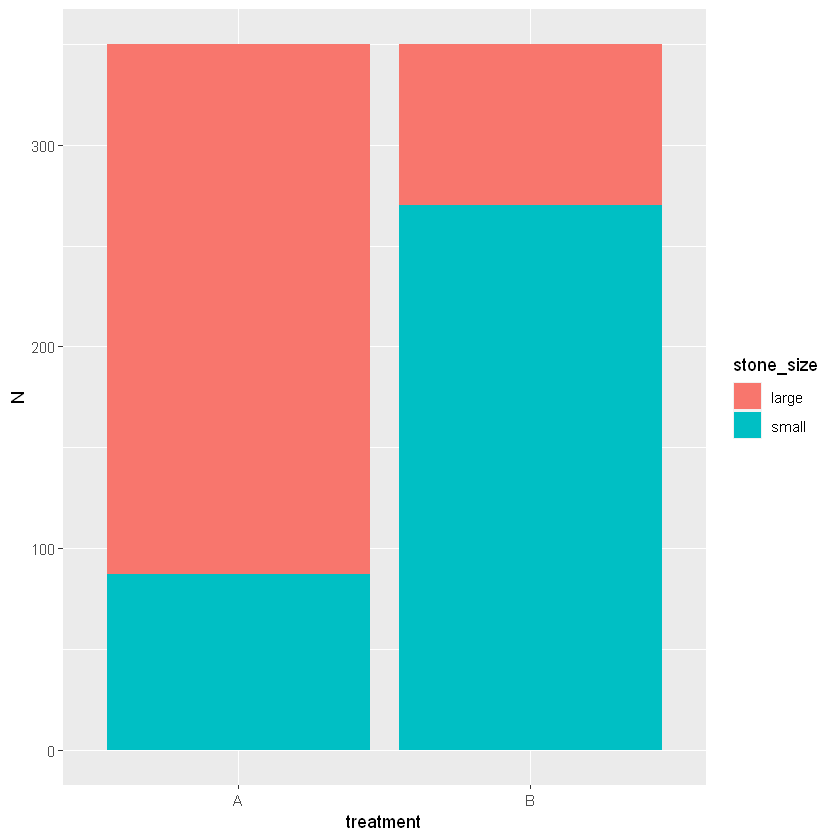

In [3]:
data_sum <- data %>%
            group_by(treatment, success, stone_size) %>%
            summarise(N=n()) %>%
            mutate(freq = N/sum(N))
# data_sum
    ggplot(data_sum, aes(x = treatment, y = N)) +
    geom_bar(aes(fill = stone_size), stat = "identity")

In [4]:
trt_stn_chi <- chisq.test(data$treatment, data$stone_size)
tidy(trt_stn_chi)

statistic,p.value,parameter,method
189.3557,4.395009e-43,1,Pearson's Chi-squared test with Yates' continuity correction


term,estimate,std.error,statistic,p.value
(Intercept),1.0332140,0.1344695,7.683629,1.546436e-14
treatmentB,-0.3572287,0.2290792,-1.559411,1.188991e-01
stone_sizesmall,1.2605654,0.2390027,5.274272,1.332838e-07


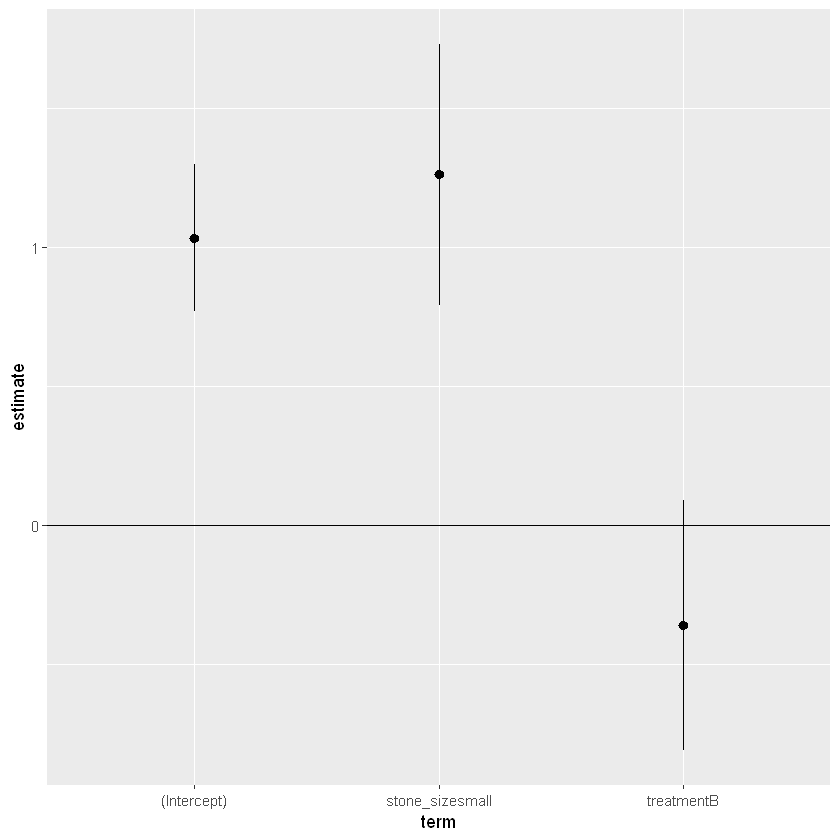

In [11]:
mod <-glm(data = data, success ~ treatment + stone_size, family = 'binomial')
mod_tdy <- tidy(mod)
mod_tdy

p<- ggplot(mod_tdy, aes(x = term, y = estimate)) +
    geom_pointrange(aes(ymin = estimate - 1.96 * std.error,
                       ymax = estimate + 1.96 * std.error)) + geom_hline(yintercept = 0)
p